<a href="https://colab.research.google.com/github/mogesTesema/Machine-Learning-Mastery-With-TensorFlow/blob/main/07_food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 1: Food Vision Big


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-25ebee9e-c088-d9be-4f3f-9a009ac3c617)
GPU 1: Tesla T4 (UUID: GPU-f4dced98-0e6f-a569-5e2e-f31ee4218b84)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-10-25 06:25:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-10-25 06:25:41 (14.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

2025-10-25 06:25:43.412655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761373543.692552      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761373543.772052      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import tensorflow_datasets as tfds

In [5]:
(train_data,test_data),ds_info = tfds.load(name="food101",
                                          split=["train","validation"],
                                            shuffle_files=True,
                                           as_supervised=True,
                                           with_info=True
                                          )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.9EVDQ6_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.9EVDQ6_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


I0000 00:00:1761373971.598652      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761373971.599293      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [6]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [7]:
class_names = ds_info.features["label"].names


In [8]:
# Take on sample of train data
train_one_sample = train_data.take(1)


In [9]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for image,label in train_one_sample:
    print(f"""
    Image shapes: {image.shape}
    Image datatype: {image.dtype}
    Target class from Food101 (tensor form): {label}
    Class name (str form): {class_names[label.numpy()]}
    """)


    Image shapes: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target class from Food101 (tensor form): 23
    Class name (str form): churros
    


In [115]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[189, 165, 121],
        [185, 161, 117],
        [181, 157, 113],
        ...,
        [111,  72,  33],
        [103,  64,  25],
        [ 94,  55,  16]],

       [[186, 162, 118],
        [183, 159, 115],
        [180, 156, 112],
        ...,
        [122,  83,  40],
        [113,  74,  31],
        [105,  66,  23]],

       [[180, 156, 112],
        [178, 154, 110],
        [177, 153, 109],
        ...,
        [132,  94,  45],
        [124,  87,  35],
        [120,  83,  31]],

       ...,

       [[207, 204, 159],
        [205, 201, 154],
        [204, 196, 147],
        ...,
        [231, 225, 191],
        [231, 225, 189],
        [231, 226, 188]],

       [[207, 204, 159],
        [205, 201, 154],
        [204, 196, 147],
        ...,
        [230, 224, 190],
        [230, 224, 188],
        [229, 223, 187]],

       [[206, 203, 158],
        [204, 200, 153],
        [203, 195, 146],
        ...,
        [229, 223, 18

In [12]:
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

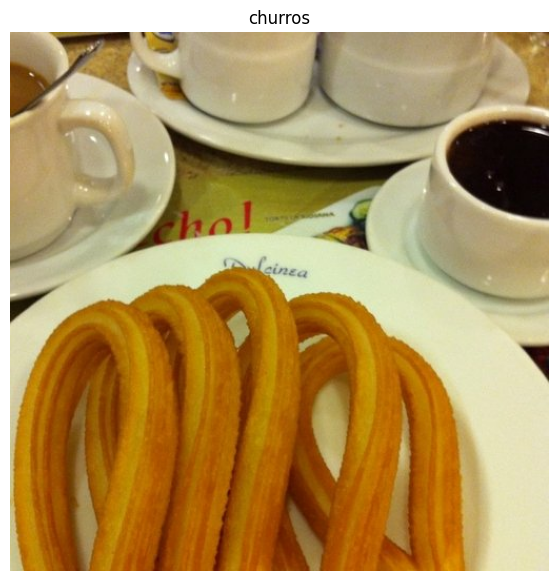

In [13]:
# plot an image
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [14]:
def preprocess_img(image,label,img_shape=224):
    """
    converts image datatype form 'uint8' -> 'float32' and reshpaes
    image to [img_shape,img_shape,color_channel]
    """
    image = tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(image,tf.float32),label

In [15]:
preprocessed_image = preprocess_img(image,label)[0]
print(f"Image before preprocessing:\n {image[:2]}.. \nshape:{image.shape},\ndatatype: {image.dtype}")
print(f"iamge after preprocessing:\n{preprocessed_image[:2]}...\nshape:{preprocessed_image.shape}\ndatatype:{preprocessed_image.dtype} ")

Image before preprocessing:
 [[[189 165 121]
  [185 161 117]
  [181 157 113]
  ...
  [111  72  33]
  [103  64  25]
  [ 94  55  16]]

 [[186 162 118]
  [183 159 115]
  [180 156 112]
  ...
  [122  83  40]
  [113  74  31]
  [105  66  23]]].. 
shape:(512, 512, 3),
datatype: <dtype: 'uint8'>
iamge after preprocessing:
[[[184.91327  160.91327  116.91326 ]
  [180.35715  156.35715  112.35714 ]
  [183.71428  160.71428  118.71429 ]
  ...
  [147.5915   108.66289   69.08129 ]
  [123.576454  84.576454  44.198887]
  [106.44359   67.44359   25.872158]]

 [[174.66837  150.66837  106.668365]
  [175.14285  151.14285  107.14286 ]
  [177.80103  153.22958  112.015305]
  ...
  [155.61722  119.545784  68.443695]
  [145.1989   108.19381   53.423363]
  [134.37747   98.30605   40.73462 ]]]...
shape:(224, 224, 3)
datatype:<dtype: 'float32'> 


In [16]:
# batch and prepare datasets
train_data = train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)


In [107]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [18]:
# shuffle training data and turn it into batchs and prefetch it(load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
# map preprocessing functions to test data
test_data = test_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
# batch and prefetch
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [19]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [116]:
import os

# Make sure folders exist
checkpoint_filepath = "/kaggle/working/best_model.h5" # Or .keras for newer versions
model_checkpoints = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    verbose=2
)


In [117]:
# setup mixed precisoin training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")


In [118]:
# Build feature extraction model
from tensorflow.keras import layers

# Create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# Create functional model
inputs = layers.Input(shape=input_shape,name="input_layer")
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D(name="Pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32,name="output_layer_float32")(x)
model = tf.keras.Model(inputs,outputs)



In [119]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [120]:
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

In [113]:
for index,layer in enumerate(model.layers):
  print(index,layer.name,layer.dtype,layer.trainable,layer.dtype_policy)

0 input_layer float32 True <DTypePolicy "mixed_float16">
1 efficientnetb0 float32 False <DTypePolicy "mixed_float16">
2 Pooling_layer float32 True <DTypePolicy "mixed_float16">
3 dense_8 float32 True <DTypePolicy "mixed_float16">
4 output_layer_float32 float32 True <DTypePolicy "float32">


In [121]:
initial_epoch = 3
history_101_food_classes_feature_exract = model.fit(train_data,
          epochs=initial_epoch,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=int(0.15*len(test_data)),
          callbacks=[create_tensorboard_callback("training_logs","efficientNet_101_feature_extract"),model_checkpoints])

Saving TensorBoard log files to: training_logs/efficientNet_101_feature_extract/20251025-083936
Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4733 - loss: 2.2956
Epoch 1: val_accuracy improved from -inf to 0.69412, saving model to /kaggle/working/model_checkpoints/ckpt/checkpoint.weights.h5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 117s 39ms/step - accuracy: 0.4733 - loss: 2.2954 - val_accuracy: 0.6941 - val_loss: 1.1353
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6718 - loss: 1.2776
Epoch 2: val_accuracy improved from 0.69412 to 0.71875, saving model to /kaggle/working/model_checkpoints/ckpt/checkpoint.weights.h5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 73s 31ms/step - accuracy: 0.6718 - loss: 1.2776 - val_accuracy: 0.7188 - val_loss: 1.0321
Epoch 3/3
2366/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7036 - loss: 1.1344
Epoch 3: val_accuracy improved from 0.71875 to 0.72802, saving model to /kaggle/working/model_checkpoints/ckpt/checkpoint.weights.h5
2

In [122]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7239 - loss: 0.9997


In [123]:
results_feature_extract_model

[0.9959046840667725, 0.7259010076522827]

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (None, 101)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_float32            │ (None, 101)            │             0 │
│ (Activation)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,437,720 (16.93 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 258,768 (1010.82 KB)

In [30]:
model.save("food_vision_model.keras")

## fine-tune food vision feature extraction model.
how to fine tune food vision feature exractor?
1. load the models best weight saved using modelcheckpoint callbacks
2. unfreeze some top layers of the model
3. recompile the model with small learning rate value usually 10X less than defualt learning rate
4. train the model with extra epoch starting from previous last epoch
5. log the training artifacts using tensorboard and modelcheckpoint callbacks.
6. that is it. DONE!

In [124]:
food_vision_model = tf.keras.models.clone_model(model)
saved_model = tf.keras.models.load_model("food_vision_model.keras")

In [75]:
food_vision_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_11 (Cast)                  │ (None, 101)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_float32            │ (None, 101)            │             0 │
│ (Activation)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [76]:
saved_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_13 (Cast)                  │ (None, 101)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_float32            │ (None, 101)            │             0 │
│ (Activation)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,437,720 (16.93 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 258,768 (1010.82 KB)

In [77]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_7 (Cast)                   │ (None, 101)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_float32            │ (None, 101)            │             0 │
│ (Activation)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,437,720 (16.93 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 258,768 (1010.82 KB)

In [125]:
for index,layer in enumerate(food_vision_model.layers):
    print(index,layer.name,layer.trainable)

0 input_layer True
1 efficientnetb0 False
2 Pooling_layer True
3 dense_9 True
4 output_layer_float32 True


In [126]:
food_vision_model.compile(loss="sparse_categorical_crossentropy",
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

### worest prediction result since the model best saved weights has not been loaded yet.
 `f.keras.models.clone_model(model)` gives the entire architecture without the learned weights. it is greate to copy the model and then train with different hyperparameter or training datasets



In [141]:
# worest prediction result since the model best saved weights has not been loaded yet.
# f.keras.models.clone_model(model) gives the entire architecture without the learned weights. it is greate to copy the model and then train with different hyperparameter or training datasets
feature_extraction_test_results = food_vision_model.evaluate(test_data)


790/790 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7236 - loss: 1.0000


In [128]:
saved_model_test_results = saved_model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.7267 - loss: 1.0080


In [135]:
results_feature_extract_model,feature_extraction_test_results,saved_model_test_results

([0.9959046840667725, 0.7259010076522827],
 [4.615140438079834, 0.009900989942252636],
 [1.0028890371322632, 0.7284356355667114])

In [136]:
for index,layer in enumerate(food_vision_model.layers):
    print(index,layer.name,layer.trainable)

0 input_layer True
1 efficientnetb0 False
2 Pooling_layer True
3 dense_9 True
4 output_layer_float32 True


In [137]:
# load the best weights of feature extractor 
food_vision_model.load_weights(checkpoint_path)


## Model recompiling after loadding best saved weights
 **`Notice:`**  we have to recompile the model after loading the saved best weights using ModelCheckpoint callback

In [142]:
food_vision_model.compile(loss="sparse_categorical_crossentropy",
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

## wow... right now, the food_vision_model evaluation results closes to original model after loading the best saved model weights.

In [143]:
#evaluate cloned food_vision_model after loading saved best weights
food_vision_model.evaluate(test_data)


790/790 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.7232 - loss: 1.0007


[0.995903491973877, 0.7259010076522827]

In [147]:
# unfreeze top 5 layers on efficientNetB0 base models
base_model_total_layers = len(food_vision_model.layers[1].layers)

# check base model layers
for index,layer in enumerate(food_vision_model.layers[1].layers):
    print(index,layer.name,layer.trainable)



0 input_layer_9 True
1 rescaling_18 False
2 normalization_9 False
3 rescaling_19 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squee

238

In [148]:
#unfreeze top 5 layers
for layer_index in range(base_model_total_layers-5,base_model_total_layers):
    food_vision_model.layers[1].layers[layer_index].trainable = True


In [149]:
for index,layer in enumerate(food_vision_model.layers[1].layers):
    print(index,layer.name,layer.trainable)


0 input_layer_9 True
1 rescaling_18 False
2 normalization_9 False
3 rescaling_19 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squee

In [150]:
# alright the top 5 layers on base model has been unfreezed. now recompile the model with 10X smaller learning rate
food_vision_model.compile(loss="sparse_categorical_crossentropy",
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                         metrics=["accuracy"]
                         )

In [151]:
# create modelcheckpoint callback to save best weights every epochs
checkpoint_path = "/kaggle/working/model_checkpoints/food_vision_model/ckpt/checkpoint.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      monitor="val_accuracy",
                                                     save_best_only=True,
                                                     save_weights_only=True,
                                                      mode="max",
                                                      save_freq="epoch"
                                                     )

In [152]:
# well done! fit the model
initial_epochs = 3 + 5
history_food_vision_model = food_vision_model.fit(train_data,
                                                 epochs=initial_epochs,
                                                 steps_per_epoch=len(train_data),
                                                 validation_data=test_data,
                                                 validation_steps=int(0.15* len(test_data)),
                                                 initial_epoch=history_101_food_classes_feature_exract.epoch[-1],
                                                 callbacks=[create_tensorboard_callback("training_logs","food_vision_fine_tuned")])

Saving TensorBoard log files to: training_logs/food_vision_fine_tuned/20251025-095115
Epoch 3/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 118s 38ms/step - accuracy: 0.7187 - loss: 1.0795 - val_accuracy: 0.7550 - val_loss: 0.8957
Epoch 4/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 73s 31ms/step - accuracy: 0.7601 - loss: 0.9032 - val_accuracy: 0.7643 - val_loss: 0.8625
Epoch 5/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 74s 31ms/step - accuracy: 0.7826 - loss: 0.8196 - val_accuracy: 0.7669 - val_loss: 0.8414
Epoch 6/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.8003 - loss: 0.7571 - val_accuracy: 0.7699 - val_loss: 0.8308
Epoch 7/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - accuracy: 0.8167 - loss: 0.7008 - val_accuracy: 0.7738 - val_loss: 0.8224
Epoch 8/8
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8297 - loss: 0.6492 - val_accuracy: 0.7773 - val_loss: 0.8131


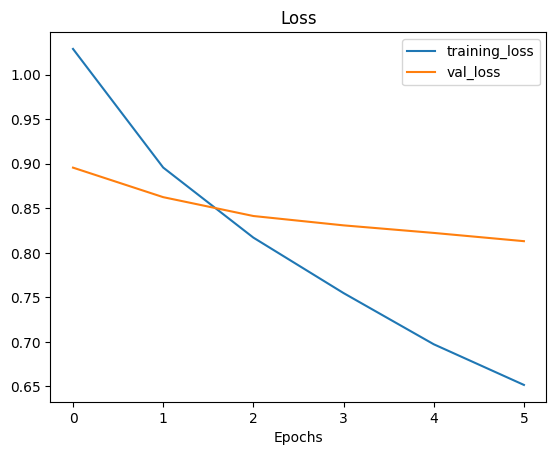

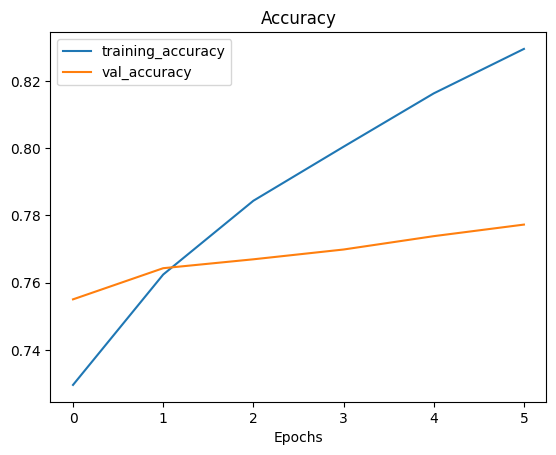

In [153]:
from helper_functions import plot_loss_curves
plot_loss_curves(history_food_vision_model)

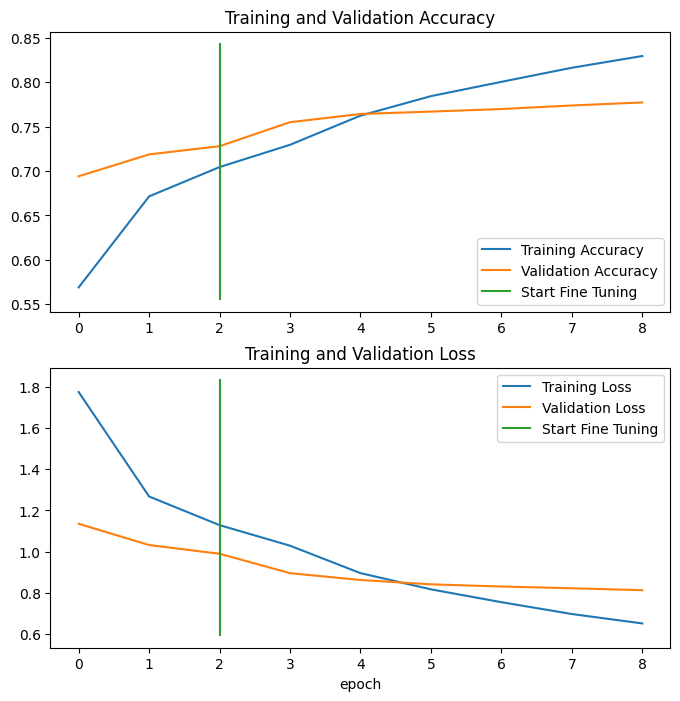

In [155]:
compare_historys(history_101_food_classes_feature_exract,history_food_vision_model,initial_epochs=3)